<body>
    <div class="alert alert-block alert-success">
    <font face = "courier" size = "+3"> <b>Feature Engineering for Diabetes Dataset</b></font>
    <p><font face = "courier" size = "+1">
        Author: Alaittin Kirtisoglu
        </font>
    </p>
    <p><font face = "courier" size = "+1">
        Date: Dec 18, 2024
        </font>
    </p>
    <p></p>
    <hr />
    <a id = '0'></a><font face = "courier" size = "+2">Table of Contents</font>
    <ol>
      <li><a href="#1">Introduction</a></li>
      <ul>
        <li><a href="#1.1">Supervised Selection Techniques</a></li>
        <li><a href="#1.2">Problem Statement</a></li>
        <li><a href="#1.3">Data Description</a></li>
        <li><a href="#1.4">Libaries and Data Exploration</a></li>
      </ul>
      <li><a href="#2">Handling Outliers</a></li>
      <li><a href="#3">Filter-based Approach</a></li>
      <ul>
        <li><a href="#3.1">Information Gain</a></li>
        <li><a href="#3.2">Chi-square Test</a></li>
        <li><a href="#3.3">Fisher's Score</a></li>
        <li><a href="#3.4">Missing Value Ratio</a></li>
      </ul>
      <li><a href="#4">Wrapper-based Approach</a></li>
      <li><a href="#5">Embedded-based Approach</a></li>
      <li><a href="#6">Conclusion</a></li>
      <li><a href="#7">References</a></li>
      <li><a href="#8">Author Message</a></li>
    </ol>
    </div>
</body>

<div class="alert alert-block alert-info">
   <a id='1'></a><font face = "courier" size = "+3"> 1|Introduction</font>
</div>

> <a id='1.1'></a><font face = "courier" size = "+2" color = "black"> 1.1|Supervised Feature Selection Techniques</font>

> <a id='1.2'></a><font face = "courier" size = "+2" color = "black"> 1.2|Problem Statement</font>

In a machine learning workflow, we pick not only the model, but also the features.

Feature selection is a producedure to find a subset of features that produces ‘better’ model for given dataset.

- Avoid overfitting and achieve better generalization ability
- Reduce the storage requirement and training time
- Interpretability 
- Avoid overfitting and achieve better generalization ability

Commonalities

- Speed up the learning process
- Reduce the storage requirements
- Improve the learning performance
- Build more generalized models

Differences

- Feature extraction obtains new features while feature selection selects a subset of original ones
- Feature selection maintains physical meanings and gives models better readability and interpretability

Roughly speaking, supervised techniques for feature selection fall into three classes:

- Filtering
- Wrapper methods
- Embedded methods

<ol>
      <li><b>Provide accurate predictions of whether an individual has diabetes.</b></li><br>
      <li><b>What</b></li>
</ol>

> <a id='1.3'></a><font face = "courier" size = "+2" color = "black"> 1.3|Data Description</font>

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. 
Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, 
and the use of preventative services. We use datasets available on [Kaggle](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data)
for year 2015. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either 
questions directly asked of participants, or calculated variables based on individual participant responses.

This dataset contains 3 files:

<p style="border: 2px solid Maroon;">1. df1.csv</p>

Clean dataset of 253,680 survey responses to the CDC's BRFSS2015. 

The target variable is Diabetes_012 has 3 classes;

0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. 

There is class imbalance in this dataset. This dataset has 21 feature variables.

<p style="border: 2px solid Maroon;">1. df2.csv</p>

Clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no 
diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no 
diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.

<p style="border: 2px solid Maroon;">1. df3.csv</p>

Clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 
0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.

> <a id='1.4'></a><font face = "courier" size = "+2" color = "black"> 1.4|Libraries and Data Exploration</font>

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('/Users/kirtisoglu/Documents/GitHub/Project-Ideas/1. Diabetes datasets/data/df1.csv')
df2 = pd.read_csv('/Users/kirtisoglu/Documents/GitHub/Project-Ideas/1. Diabetes datasets/data/df2.csv')
df3 = pd.read_csv('/Users/kirtisoglu/Documents/GitHub/Project-Ideas/1. Diabetes datasets/data/df3.csv')

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

<div class="alert alert-block alert-info">
   <a id='2'></a><font face = "courier" size = "+3"> 2|Handling Outliers</font>
</div>

Outlier: A data object that deviates significantly from the normal objects as if it were generated by a different mechanism.

- <b>Global outlier:</b> A data object that deviates significantly from the rest of the objects.

- <b>Contextual (or conditional) outlier:</b> 

- <b>Collective Outliers:</b> 

<div class="alert alert-block alert-info">
   <a id='3'></a><font face = "courier" size = "+3"> 3|Filter-based Approach</font>
</div>

Filtering techniques preprocess features to remove ones that are unlikely to be
useful for the model. One could compute the correlation or mutual
information between each feature and the response variable, and filter out the
features that fall below a threshold.

 Filtering techniques are much cheaper than the wrapper
techniques described next, but they do not take into account the model being
employed. Hence, they may not be able to select the right features for the model.
It is best to do prefiltering conservatively, so as not to inadvertently eliminate
useful features before they even make it to the model training step.

  - Based on data intrinsic attributes such as feature correlation or statistics.
  - Computationally efficient and may be used with a variety of learning algorithms. 
  - They do not account for the interaction between the features and the learning method,
    so they may not always capture the ideal feature subset for a certain algorithm.

> <a id='3.1'></a><font face = "courier" size = "+2" color = "black"> 3.1|Information Gain</font>

Information Gain is a statistic that measures the reduction in entropy (uncertainty) for a specific feature by dividing the data according to that characteristic. 

It is often used in decision tree algorithms and also has useful features. 

The primary objective of this code is to calculate feature importance scores based on Information Gain, which helps identify the most relevant features for the predictive model. 

By determining these scores, you can make informed decisions about which features to include or exclude from your analysis, ultimately leading to improved model performance, 
reduced overfitting, and faster training times.

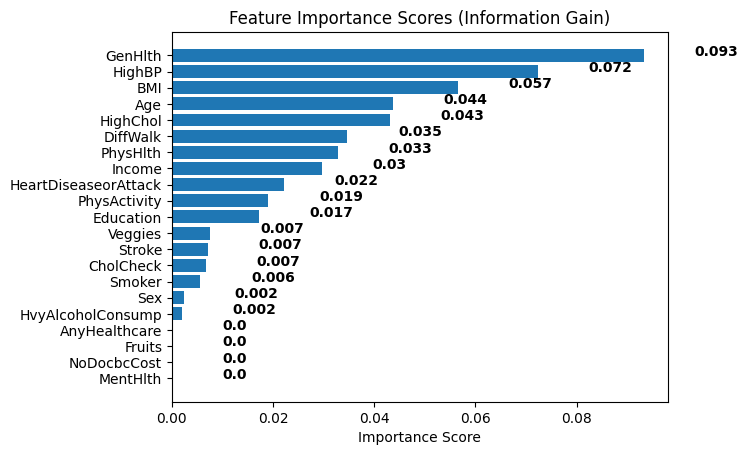

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

y = df2[df2.columns[0]]
X = df2.copy()
X.drop(df2.columns[0], axis=1, inplace=True)

# Apply Information Gain
gain = mutual_info_regression(X, y)

# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(X.columns)):
    feature_scores[X.columns[i]] = gain[i]
    
# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

Fruits, NoDocbcCost, MentHlth, and AnyHealthcare has zero information gain. We will fit logistic regression excluding these columns.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [6]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)
log_reg.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def predict_and_plot(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    return preds

# Predict and plot on the training data
train_preds = predict_and_plot(log_reg, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(log_reg, X_test, y_test, 'Validation')

Accuracy: 74.85%
Accuracy: 74.55%


In [7]:
zero_gain = ["Fruits", "NoDocbcCost", "MentHlth", "AnyHealthcare"]
XX = X.copy()
XX.drop(zero_gain, axis=1, inplace=True)

XX_train, XX_test, yy_train, yy_test = train_test_split(XX,y, test_size = 0.20)

logg_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)
logg_reg.fit(XX_train, yy_train)

# Predict and plot on the training data
train_preds = predict_and_plot(logg_reg, XX_train, yy_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(logg_reg, XX_test, yy_test, 'Validation')

Accuracy: 74.71%
Accuracy: 75.28%


In [9]:
XX.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Veggies,HvyAlcoholConsump,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,30.0,0.0,1.0,4.0,6.0,8.0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,10.0,0.0,1.0,13.0,6.0,8.0
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,8.0,5.0,8.0


> <a id='3.2'></a><font face = "courier" size = "+2" color = "black"> 3.2|Chi-square Test</font>

The Chi-square test is a statistical test used to assess the relationship between two categorical variables. 

It is used in feature selection to analyze the relationship between a categorical feature and the target variable.

A greater Chi-square score shows a stronger link between the feature and the target, showing that the feature is more important for the classification job.

While the Chi-square test is a commonly used feature selection method, it is typically used for categorical data, where the features and target variables are discrete.

> <a id='3.3'></a><font face = "courier" size = "+2" color = "black"> 3.3|Fisher's Score</font>

Fisher's Discriminant Ratio, commonly known as Fisher's Score, is a feature selection approach that ranks features based on their ability to differentiate various classes in a dataset. It may be used for continuous features in a classification problem.

Fisher's Score is calculated as the ratio of between-class and within-class variance. A higher Fisher's Score implies the characteristic is more discriminative and valuable for classification.

To use Fisher's Score for feature selection, compute a score for each continuous feature and rank them according to their scores. The model considers features with a higher Fisher's Score more important.

We skip this since our data does not have continuous features.

> <a id='3.4'></a><font face = "courier" size = "+2" color = "black"> 3.4|Missing Value Ratio</font>

### ! Used for for categorical data, where the features and target variables are discrete.

The Missing Value Ratio is a straightforward feature selection method that makes decisions based on the number of missing values in a feature.

Features having a significant proportion of missing values may be uninformative and may harm the model's performance. You can filter out features 

with too many missing values by specifying a threshold for the acceptable missing value ratio.


    It is used in feature selection to analyze the relationship between a categorical feature and the target variable.

    A greater Chi-square score shows a stronger link between the feature and the target, showing that the feature is more important for the classification job.

    While the Chi-square test is a commonly used feature selection method, it is typically used for categorical data, where the features and target variables are discrete.

<div class="alert alert-block alert-info">
   <a id='4'></a><font face = "courier" size = "+3"> 4|Wrapper-based Approach</font>
</div>

These techniques are expensive, but they allow you to try out subsets of features,
which means you won’t accidentally prune away features that are uninformative
by themselves but useful when taken in combination. The wrapper method treats
the model as a black box that provides a quality score of a proposed subset for
features. There is a separate method that iteratively refines the subset.

> <a id='4.1'></a><font face = "courier" size = "+2" color = "black"> 4.1|Forward Selection</font>

In forward selection, you start with an empty feature set and iteratively add features to the set. 

At each step, you evaluate the model's performance with the current feature set and the additional feature. 

The feature that results in the best performance improvement is added to the set.

The process continues until no significant improvement in performance is observed, or a predefined number of features is reached.



In [10]:
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the logistic regression model
model = LogisticRegression()

# Define the forward selection object
sfs = SFS(model,
          k_features=5,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)

# Perform forward selection on the training set
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(5, 5),
                          scoring='accuracy')

Additionally, we need to evaluate the performance of the selected features on the testing set and visualize the model's performance with different feature subsets in a line chart.

The chart will show the cross-validated accuracy as a function of the number of features, providing insights into the trade-off between model complexity and predictive performance.

By analyzing the output and the chart, you can determine the optimal number of features to include in your model, ultimately improving its performance and reducing overfitting.

Selected Features: ('HighBP', 'HighChol', 'BMI', 'GenHlth', 'Age')
Accuracy: 0.7421591115245313


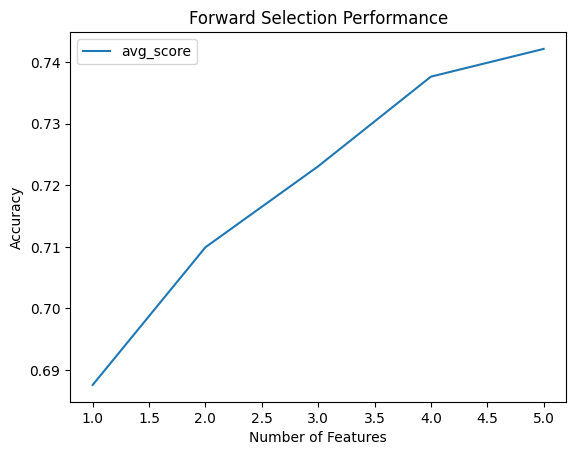

In [11]:
# Print the selected features
print('Selected Features:', sfs.k_feature_names_)

# Evaluate the performance of the selected features on the testing set
accuracy = sfs.k_score_
print('Accuracy:', accuracy)

# Plot the performance of the model with different feature subsets
sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df['avg_score'] = sfs_df['avg_score'].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind='line', y='avg_score', ax=ax)
ax.set_xlabel('Number of Features')
ax.set_ylabel('Accuracy')
ax.set_title('Forward Selection Performance')
plt.show()

> <a id='4.2'></a><font face = "courier" size = "+2" color = "black"> 4.2|Backward Selection</font>

The opposite of forward selection is backward selection. You begin with the entire feature set and gradually eliminate features from it.

At each phase, you measure the model's performance with the current feature set minus the feature to be deleted.

The feature that causes the least amount of performance reduction gets eliminated from the set.

The procedure is repeated until there is no substantial increase in performance or a preset number of features is reached.

> <a id='4.3'></a><font face = "courier" size = "+2" color = "black"> 4.3|Exhaustive Selection</font>

Exhaustive feature selection compares the performance of all possible feature subsets and chooses the best-performing subset. 

This approach is computationally demanding, especially for large datasets, yet it ensures the best feature subset.

> <a id='4.4'></a><font face = "courier" size = "+2" color = "black"> 4.4|Recursive Elimination</font>

Recursive feature elimination starts with the whole feature set and eliminates features repeatedly depending on their relevance as judged by the learning algorithm. 

The least important feature is removed at each step, and the model is retrained. The method is repeated until a predetermined number of features are achieved.

<div class="alert alert-block alert-info">
   <a id='5'></a><font face = "courier" size = "+3"> 5|Embedded-based Approach</font>
</div>

These methods perform feature selection as part of the model training process.
For example, a decision tree inherently performs feature selection because it
selects one feature on which to split the tree at each training step. Another exam‐
ple is the $\mathcal{l}^1$ regularizer, which can be added to the training objective of any linear model. 
The $\mathcal{l}^1$ regularizer encourages models that use a few features as opposed
to a lot of features, so it’s also known as a sparsity constraint on the model.

Embedded methods incorporate feature selection as part of the model training
process. They are not as powerful as wrapper methods, but they are nowhere
near as expensive. Compared to filtering, embedded methods select features that
are specific to the model. In this sense, embedded methods strike a balance
between computational expense and quality of results.

> <a id='5.1'></a><font face = "courier" size = "+2" color = "black"> 5.1|Regularization</font>

Regularization is a method that adds a penalty term to the loss function to prevent overfitting in machine learning models.

Regularization methods, such as lasso (L1 regularization) and ridge (L2 regularization), can be used in conjunction with feature selection 

to decrease the coefficients of less significant features towards zero, thereby picking a subset of the most relevant features.

> <a id='5.2'></a><font face = "courier" size = "+2" color = "black"> 5.2|Random Forest Importance</font>

<div class="alert alert-block alert-info">
   <a id='6'></a><font face = "courier" size = "+3"> 6|Feature Extraction</font>
</div>

<div class="alert alert-block alert-info">
   <a id='7'></a><font face = "courier" size = "+3"> 7|Conclusion</font>
</div>

<div class="alert alert-block alert-info">
   <a id='8'></a><font face = "courier" size = "+3"> 8|References</font>
</div>

https://hpi.de/fileadmin/user_upload/fachgebiete/boettinger/documents/Kurse_WS_1920/Data_Management_for_Digital_Health/200116_Data_Preprocessing.pdf

https://ift6758.github.io/lectures/feature_engineering.pdf

https://www.repath.in/gallery/feature_engineering_for_machine_learning.pdf

https://upcommons.upc.edu/bitstream/handle/2117/97413/R02-62.pdf

https://www.kdnuggets.com/2023/06/advanced-feature-selection-techniques-machine-learning-models.html

https://ift6758.github.io/lectures/feature_selection.pdf

https://www.cs.cmu.edu/~kdeng/thesis/feature.pdf

file:///Users/kirtisoglu/Downloads/A_Comprehensive_Review_of_Feature_Selection_and_Fe.pdf

https://scikit-learn.org/1.5/modules/feature_selection.html#univariate-feature-selection

https://www.public.asu.edu/%7Ehuanliu/papers/pakdd00clu.pdf

<div class="alert alert-block alert-info">
   <a id='9'></a><font face = "courier" size = "+3"> 9|Author Message</font>
</div>

Author : <b>Alaittin Kirtisoglu</b>


👉Read more project : 

👉Shoot me emails : akirtisoglu@hawk.iit.edu

👉Connect on LinkedIn : https://www.linkedin.com/in/alaittin-kirtisoglu/

👉Explore Github : https://github.com/kirtisoglu

If you have any questions, feel free to comment!


✨Best Wishes✨